In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [2]:
# include_top = True와 비교
model1 = VGG16(weights='imagenet', include_top=False)
model1.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [8]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

from matplotlib.pyplot import imshow
from PIL import Image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np

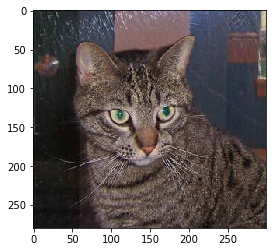

In [3]:
img = Image.open('cat.jpg')
imshow(np.asarray(img))

300 280 10 0 280


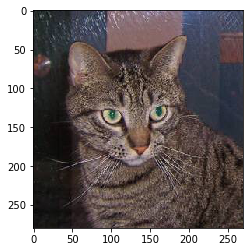

In [4]:
img = Image.open('cat.jpg')
w, h = img.size
s = min(w, h)
y = (h - s) // 2
x = (w - s) // 2
print(w, h, x, y, s)
img = img.crop((x, y, s, s))
# 4-tuple defining the left, upper, right, and lower pixel coordinate
imshow(np.asarray(img))

In [5]:
model.layers[0].input_shape

[(None, 224, 224, 3)]

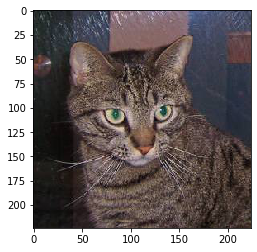

In [6]:
target_size = 224
img = img.resize((target_size, target_size)) # resize from 280x280 to 224x224
imshow(np.asarray(img))

In [9]:
np_img = image.img_to_array(img)
np_img.shape

(224, 224, 3)

In [10]:
img_batch = np.expand_dims(np_img, axis=0)

In [11]:
img_batch.shape

(1, 224, 224, 3)

In [12]:
img_batch

array([[[[ 38.,  41.,  46.],
         [ 30.,  34.,  37.],
         [ 56.,  60.,  59.],
         ...,
         [ 74.,  81., 107.],
         [ 85.,  92., 118.],
         [ 54.,  61.,  87.]],

        [[ 39.,  42.,  47.],
         [ 29.,  33.,  36.],
         [ 48.,  52.,  51.],
         ...,
         [ 72.,  79., 105.],
         [ 84.,  91., 117.],
         [ 63.,  70.,  96.]],

        [[ 57.,  60.,  65.],
         [ 43.,  47.,  50.],
         [ 38.,  42.,  41.],
         ...,
         [ 75.,  82., 108.],
         [ 86.,  93., 119.],
         [ 89.,  96., 122.]],

        ...,

        [[ 23.,  21.,  22.],
         [ 23.,  21.,  22.],
         [ 21.,  19.,  20.],
         ...,
         [ 78.,  61.,  53.],
         [ 66.,  49.,  39.],
         [ 65.,  49.,  36.]],

        [[ 25.,  23.,  24.],
         [ 26.,  24.,  25.],
         [ 24.,  22.,  23.],
         ...,
         [ 61.,  44.,  36.],
         [ 68.,  51.,  41.],
         [ 72.,  56.,  43.]],

        [[ 26.,  24.,  25.],
       

In [13]:
pre_processed = preprocess_input(img_batch)

In [14]:
pre_processed.shape

(1, 224, 224, 3)

In [15]:
pre_processed

array([[[[ -57.939003,  -75.779   ,  -85.68    ],
         [ -66.939   ,  -82.779   ,  -93.68    ],
         [ -44.939003,  -56.779   ,  -67.68    ],
         ...,
         [   3.060997,  -35.779   ,  -49.68    ],
         [  14.060997,  -24.779   ,  -38.68    ],
         [ -16.939003,  -55.779   ,  -69.68    ]],

        [[ -56.939003,  -74.779   ,  -84.68    ],
         [ -67.939   ,  -83.779   ,  -94.68    ],
         [ -52.939003,  -64.779   ,  -75.68    ],
         ...,
         [   1.060997,  -37.779   ,  -51.68    ],
         [  13.060997,  -25.779   ,  -39.68    ],
         [  -7.939003,  -46.779   ,  -60.68    ]],

        [[ -38.939003,  -56.779   ,  -66.68    ],
         [ -53.939003,  -69.779   ,  -80.68    ],
         [ -62.939003,  -74.779   ,  -85.68    ],
         ...,
         [   4.060997,  -34.779   ,  -48.68    ],
         [  15.060997,  -23.779   ,  -37.68    ],
         [  18.060997,  -20.779   ,  -34.68    ]],

        ...,

        [[ -81.939   ,  -95.779   , -1

In [16]:
features = model.predict(pre_processed)

In [17]:
features.shape
# 종속변수가 취할 수 있는 값의 수 = 1000

(1, 1000)

In [18]:
features
# 각 원소의 값은 종속변수가 각 값을 갖을 확률을 의미

array([[2.33608944e-06, 5.12595352e-06, 1.66672498e-06, 4.01411671e-06,
        6.93113293e-07, 4.33291643e-06, 8.39317693e-07, 1.25821371e-05,
        7.20361322e-06, 9.77864033e-07, 5.15957140e-07, 4.87251896e-07,
        4.23556912e-06, 6.55681924e-06, 3.56888989e-07, 2.64096707e-05,
        1.40103020e-06, 3.76228172e-06, 5.35357731e-06, 2.54275960e-07,
        5.31327305e-06, 2.71456724e-06, 1.14740044e-06, 1.00824013e-06,
        9.14107295e-05, 4.32070891e-07, 1.07939002e-06, 1.36287713e-06,
        4.86939257e-07, 9.88366651e-07, 2.80728818e-06, 2.24373457e-06,
        8.41391739e-07, 2.10414342e-07, 7.65885488e-07, 6.05937294e-06,
        3.97935491e-06, 6.85141185e-06, 3.22782739e-06, 2.07975445e-05,
        7.29149588e-06, 3.03240472e-06, 1.87367380e-06, 1.12886810e-05,
        2.59500903e-05, 1.59960109e-06, 5.71451383e-05, 7.67545771e-06,
        2.34103391e-06, 5.72332465e-06, 5.63907042e-06, 1.63307668e-05,
        1.47123592e-06, 8.78483263e-07, 6.27397185e-06, 3.434127

In [19]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
features

array([[0.0000000009, 0.0000000794, 0.000000011 , 0.0000000021,
        0.0000000006, 0.0000000032, 0.0000000041, 0.0000000655,
        0.0000001231, 0.0000000046, 0.0000000016, 0.0000000077,
        0.0000000014, 0.0000000033, 0.000000003 , 0.0000000171,
        0.0000000209, 0.0000000828, 0.0000000182, 0.0000000055,
        0.0000000159, 0.0000000055, 0.0000000267, 0.000000006 ,
        0.0000000015, 0.0000000037, 0.0000000023, 0.0000000846,
        0.0000000033, 0.0000000045, 0.000000002 , 0.0000000173,
        0.0000000028, 0.0000000033, 0.0000000032, 0.0000000011,
        0.0000000034, 0.0000000116, 0.000000002 , 0.0000000015,
        0.0000000443, 0.0000000017, 0.0000000037, 0.000000004 ,
        0.0000000032, 0.0000000007, 0.0000000327, 0.000000002 ,
        0.0000000009, 0.0000000093, 0.000000014 , 0.0000000025,
        0.0000000054, 0.0000000077, 0.000000002 , 0.0000000456,
        0.000000013 , 0.0000000298, 0.000000018 , 0.0000000282,
        0.0000000156, 0.0000000105, 0.00

In [19]:
np.max(features)

0.52531934

In [20]:
decode_predictions(features, top=5)

[[('n02123045', 'tabby', 0.52531934),
  ('n02123159', 'tiger_cat', 0.33884382),
  ('n02124075', 'Egyptian_cat', 0.06950579),
  ('n03223299', 'doormat', 0.004879551),
  ('n02971356', 'carton', 0.0042829174)]]

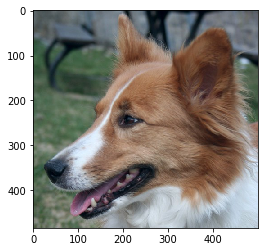

In [22]:
img_dog = Image.open('dog.jpg')
imshow(np.asarray(img_dog))

500 484 8 0 484


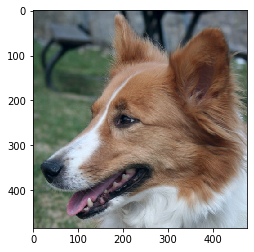

In [23]:
w, h = img_dog.size
s = min(w, h)
y = (h - s) // 2
x = (w - s) // 2
print(w, h, x, y, s)
img_dog = img_dog.crop((x, y, s, s))
imshow(np.asarray(img_dog))

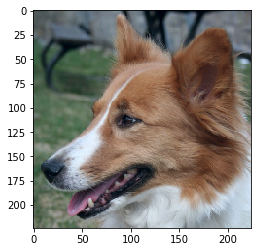

In [25]:
target_size = 224
img_dog = img_dog.resize((target_size, target_size))
imshow(np.asarray(img_dog))

In [26]:
np_img = image.img_to_array(img)
img_batch = np.expand_dims(np_img, axis=0)
pre_processed = preprocess_input(img_batch)
features_dog = model.predict(pre_processed)

In [27]:
np.max(features_dog)

0.5745998

In [28]:
decode_predictions(features_dog, top=5)

[[('n02106030', 'collie', 0.5745998),
  ('n02105855', 'Shetland_sheepdog', 0.25043035),
  ('n02113023', 'Pembroke', 0.099984534),
  ('n02106166', 'Border_collie', 0.036252044),
  ('n02113186', 'Cardigan', 0.025582973)]]